In [4]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # deaktiviert Warnungen 
%matplotlib inline

In [5]:
from Modell.m_single import Platte as pl
from Modell.m_single import Kugel as kl
from Modell.m_multiple import m_multiple
from Modell.m_noniso import m_noniso
from Modell.m_hierarchisch import m_hierarchisch

### **5. die charakteristische in-phase und out-of-phase Funktion von Multiple Diffusionsmodell**
+ **Initialisieren (Song und Rees 2008)**
    + **Platte 1:**
        + **Dicke von der Platte:  L = 20 µm**
        + **Diffusionskoeffizienten D = 5∙10^(−10) m^2/s**
        + **K = 0.5**
    + **Platte 2:** 
        + **Dicke von der Platte:  L = 20 µm**
        + **Diffusionskoeffizienten D = 10^(−10) m^2/s**
        + **K = 0.5**

In [24]:
def th_multiple_0(L, list_D, f, list_K):
    labels = ['Prozess 1_in-phase', 'Prozess 2_in-phase', 'Prozess in-phase',
              'Prozess 1_out-of-phase', 'Prozess 2_out-of-phase', 'Prozess out-of-phase']
    color = ['m', 'm','m', 'b', 'b', 'b']
    linestyle = ['--', 'dashdot', '-', '--', 'dashdot', '-']
    plt.figure(figsize = (10,7))
    
    x = f
    p_1, p_2 = pl(L, list_D[0], f, list_K[0]), pl(L, list_D[1], f, list_K[1])
    p_3 = m_multiple(list_delta_c=[p_1.func_delta_1c(), p_2.func_delta_1c()], 
                     list_delta_s=[p_1.func_delta_1s(), p_2.func_delta_1s()], 
                     list_K = list_K)
    y = [p_1.func_chara_1c(), p_2.func_chara_1c(), p_3.func_chara_c(), 
         p_1.func_chara_1s(), p_2.func_chara_1s(), p_3.func_chara_s()]
    
    for i in range(6):
        plt.plot(x, y[i], label = labels[i], linestyle = linestyle[i], 
                 linewidth = 2, color=color[i])
    
    plt.ylabel('charakteristische Funktion K∙δ', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 10)
    
    plt.legend(loc = 1,fontsize = 15), plt.grid(True)

In [10]:
def th_multiple_1(L, list_D, f, list_K):
    th_multiple_0(L, list_D, f, list_K)
    plt.xlim(0.01, 100), plt.ylim(0,1), plt.xscale('log'), plt.yscale('linear')
    plt.xticks([10**-2, 10**-1, 10**0, 10**1, 10**2], [0.01,0.1,1,10,100], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], rotation = 0, fontsize = 14, x = -0.01)
    # plt.title("die charakteristische Funktionen von Multiple Diffusionsmodell(1)",fontsize = 18, y = -0.15, color = 'b')

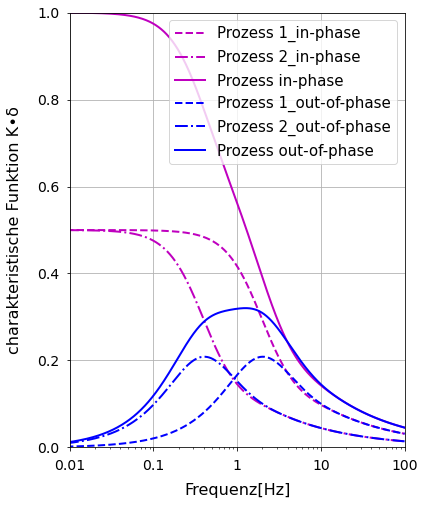

In [15]:
np_f = np.linspace(0.001, 100, num = 100000)
abb_multi = th_multiple_1(L=2e-5, list_D = [5e-10, 1e-10], f = np_f, list_K=[0.5, 0.5])
abb_multi

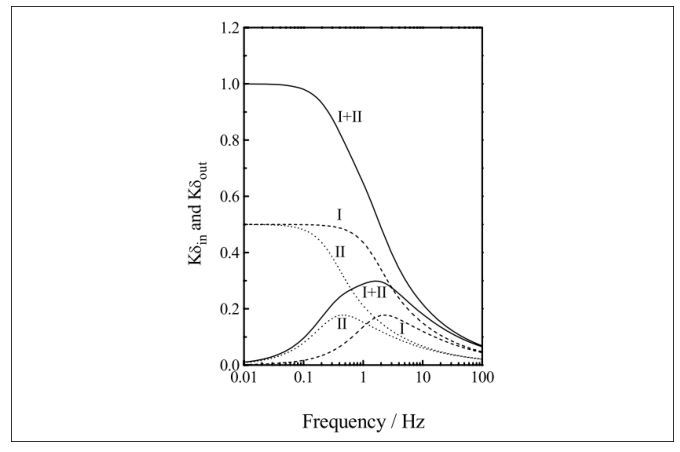

In [6]:
import imageio
lt_2 = imageio.imread('PNG/lt_2.png')
plt.figure(figsize = (12,8))
plt.xticks([])
plt.yticks([])
plt.imshow(lt_2)

+ **Initialisieren ((Turner u. a. 2001))**
    + **Platte 1:**
        + **Dicke von der Platte:  L = 10 µm**
        + **Diffusionskoeffizienten D = 10^(−10) m^2/s**
        + **K = 1**
    + **Platte 2:** 
        + **Dicke von der Platte:  L = 10 µm**
        + **Diffusionskoeffizienten D = 5∙10^(−12) m^2/s**
        + **K = 1**

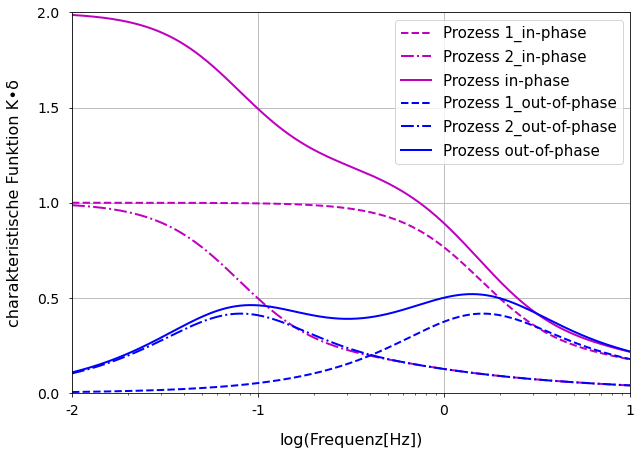

In [25]:
def th_multiple_3(L, list_D, f, list_K):
    th_multiple_0(L, list_D, f, list_K)
    
    plt.xlim(0.01, 10) ,plt.ylim(0,1) ,plt.xscale('log') ,plt.yscale('linear')
    plt.xticks([10**-2, 10**-1, 10**0, 10**1], [-2,-1,0,1], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.5, 1, 1.5, 2], rotation = 0, fontsize = 14, x = -0.01)
    
    plt.xlabel('log(Frequenz[Hz])', fontsize = 16, labelpad = 15)
    # plt.title("die charakteristische Funktionen von Multiple Diffusionsmodell(3)",fontsize = 18, y = -0.15, color = 'b')

abb_multi_3 = th_multiple_3(L=1e-5, list_D = [1e-10, 5e-12], f = np.linspace(0.001, 100, num = 1000000), list_K=[1,1])
abb_multi_3

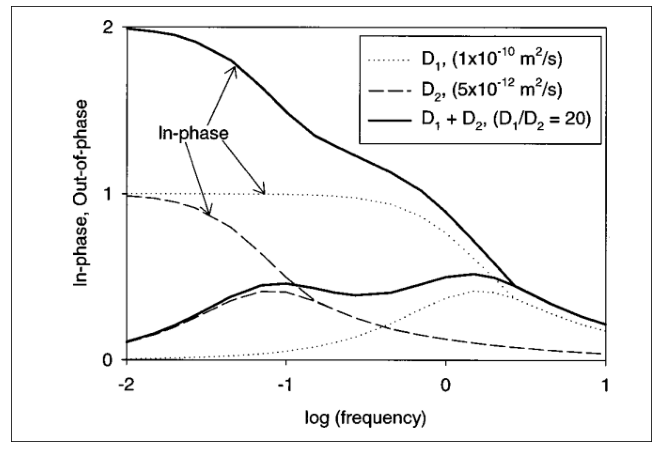

In [8]:
lt_4 = plt.imread('PNG/lt_4.png')
plt.figure(figsize = (15,8))
plt.xticks([])
plt.yticks([])
plt.imshow(lt_4)

### **6. die charakteristische in-phase und out-of-phase Funktion von Nichtisothermes Diffusionsmodell**
+ **Initialisieren (Sun und Bourdin 1993)**
    + **Kugel:** 
        + **Kugelradius a = 3µm**
        + **Diffusionskoeffizienten D = [6∙10^(−12), 2∙10^(−10), (2/3)∙10^(−10)] 𝑚^2/𝑠,**  
        + **Parameter t_D = (a^2)/15D = [0.1, 0.3, 0.9]s**
        + **K = 1**
        + **nichtisothermisches Verhalten**
            + **t_h = 0.5s: Zeitkonstante für den Wärmeaustausch zwischen dem Adsorptionsmittel und seiner Umgebung**
            + **gamma = 1: ein Maß für die Nichtisothermie des Adsorbat-Adsorbens-Systems**

#### **6.1 die charakteristische in-phase Funktion von nichtisothermes Diffusionsmodell**

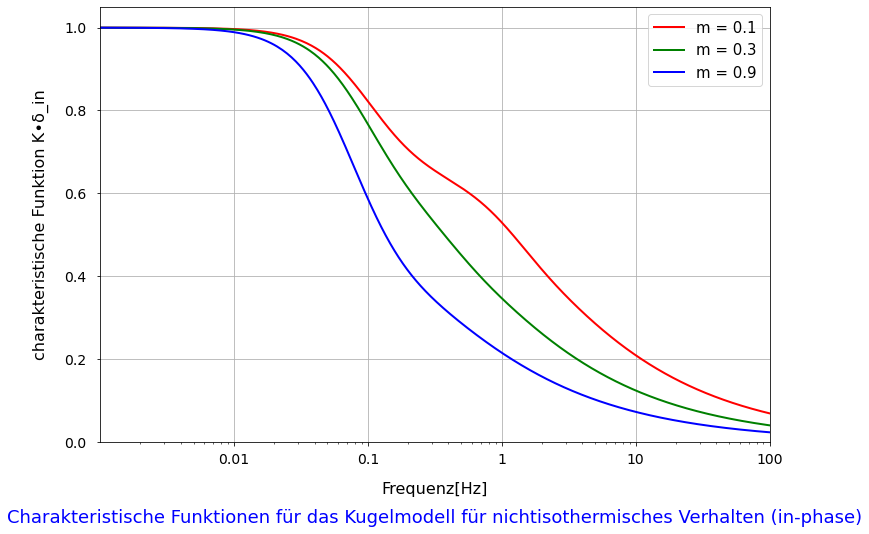

In [9]:
def th_in_noniso(a, list_D, f, K, t_h, gamma):
    labels = ['m = 0.1', 'm = 0.3', 'm = 0.9']
    color = ['r', 'g', 'b']
    plt.figure(figsize = (12,8))
    
    x = f
    l = len(list_D)
    k, n, y = list(), list(), list()
    
    for i in range(l):
        k.append(kl(a, list_D[i], f, K))
        n.append(m_noniso(f=f, list_delta_c=[k[i].func_delta_3c()], list_delta_s=[k[i].func_delta_3s()], list_K=[K], t_h=t_h, gamma=gamma))
        y.append(n[i].func_chara_noniso_c())
        plt.plot(x, y[i], label = labels[i], linewidth = 2, color =color[i])
    
    plt.xlim(0.001,100),plt.ylim(0,1.05), plt.xscale('log'), plt.yscale('linear')
    plt.xticks([10**-2, 10**-1, 10**0, 10**1, 10**2], [0.01,0.1,1,10,100], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], rotation = 0, fontsize = 14, x = -0.01)
    
    plt.ylabel('charakteristische Funktion K∙δ_in', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 15)
    plt.title("Charakteristische Funktionen für das Kugelmodell für nichtisothermisches Verhalten (in-phase)",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 15), plt.grid(True)
    
abb_in_noniso = th_in_noniso(f=np.linspace(0.001, 100, num = 100000), a=3e-6, list_D=[6e-12, 2e-12, 2e-12/3], K=1, t_h=1, gamma=0.5)
abb_in_noniso

#### **6.2 die charakteristische out-of-phase Funktion von nichtisothermes Diffusionsmodell**

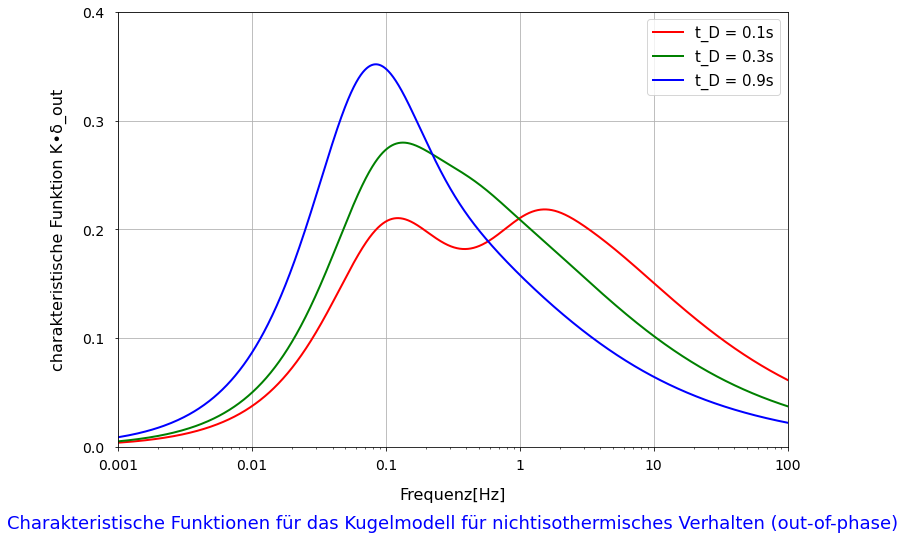

In [10]:
def th_out_noniso(a, list_D, f, K, t_h, gamma):
    labels = ['t_D = 0.1s', 't_D = 0.3s', 't_D = 0.9s']
    color = ['r', 'g', 'b']
    plt.figure(figsize = (12,8))
    
    x = f
    l = len(list_D)
    k, n, y = list(), list(), list()
    
    for i in range(l):
        k.append(kl(a, list_D[i], f, K))
        n.append(m_noniso(f=f, list_delta_c=[k[i].func_delta_3c()], list_delta_s=[k[i].func_delta_3s()], list_K=[K], t_h=t_h, gamma=gamma))
        y.append(n[i].func_chara_noniso_s())
        plt.plot(x, y[i], label = labels[i], linewidth = 2, color =color[i])
    
    plt.xlim(0.001,100), plt.ylim(0,0.4), plt.xscale('log'), plt.yscale('linear')
    plt.xticks([10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2], [0.001,0.01,0.1,1,10,100], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4], rotation = 0, fontsize = 14, x = -0.01)
    
    plt.ylabel('charakteristische Funktion K∙δ_out', fontsize = 16, labelpad = 15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 15)
    plt.title("Charakteristische Funktionen für das Kugelmodell für nichtisothermisches Verhalten (out-of-phase)",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 15), plt.grid(True)
    
abb_out_noniso = th_out_noniso(f=np.linspace(0.001, 100, num = 1000000), a=3e-6, list_D=[6e-12, 2e-12, 2e-12/3], K=1, t_h=1, gamma=0.5)
abb_out_noniso

+ **In der Literatur t_H = t_h * gamma = 1 * 0.5 = 0.5**

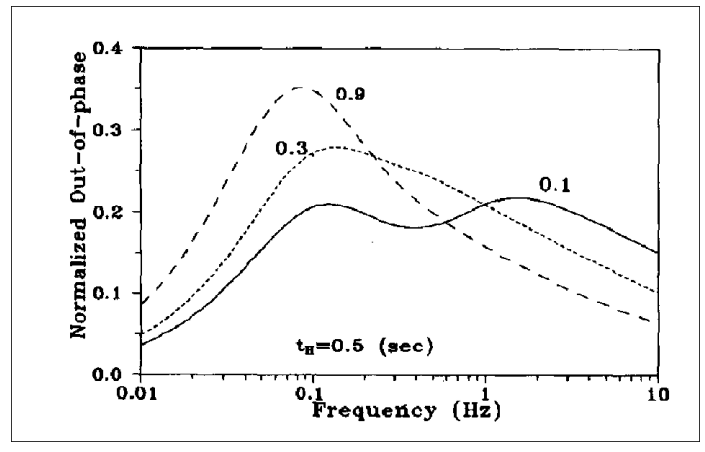

In [11]:
lt_5 = plt.imread('PNG/lt_5.png')
plt.figure(figsize = (15,8))
plt.xticks([])
plt.yticks([])
plt.imshow(lt_5)

### **7. die charakteristische in-phase und out-of-phase Funktion von Diffusionsmodell für hierarchischen Porensystemen**
+ **Initialisieren (Sun und Bourdin 1993)**
    + **Platte:** 
        + **Dicke von der Platte:  L = 1.2µm**
        + **Diffusionskoeffizienten D = 1.2∙10^(−12) 𝑚^2/𝑠,**  
        + **K = 0.71**
        + **Parameter t_D = (L^2)/4D = 0.3s**
        + **hierarchisches Porensystem**
            + **t_R = [0s, 0.5s, 2.5s]: Zeitkonstante für den Massenaustausch zwischen den beiden Porensorten**
            + **K_omega = 0.4: relative Gleichgewichtskonstante der Konzentration in den Speicherporen im Verhältnis zu den Transportporen**

#### **7.1 die charakteristische in-phase Funktion von Diffusionsmodell für hierarchischen Porensystemen**

In [12]:
def th_in_hierar(L, D, f, K, list_t_R, K_omega):
    labels = ['t_R = 0s', 't_R = 0.5s', 't_R = 2.5s']
    color = ['r', 'g', 'b']
    plt.figure(figsize=(12, 8))

    x = f
    l = len(list_t_R)
    list_D, y = list(), list()
    p = pl(L, D, f, K)

    for i in range(l):
        list_D.append(m_hierarchisch(f=f, list_delta_c=[p.func_delta_1c()], list_delta_s=[p.func_delta_1s()], 
                                     list_K=[K], t_R=list_t_R[i], K_omega=K_omega))
        y.append(list_D[i].func_chara_hierar_c())
        plt.plot(x, y[i], label=labels[i], linewidth=2, color=color[i])

    plt.xlim(0.01, 100), plt.ylim(0, 1.02), plt.xscale('log'), plt.yscale('linear')
    plt.xticks([10**-2, 10**-1, 10**0, 10**1, 10**2], [0.01,0.1,1,10,100], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], rotation = 0, fontsize = 14, x = -0.01)
    
    plt.ylabel('charakteristische Funktion K∙δ_in', fontsize = 16, labelpad = 
               15)
    plt.xlabel('Frequenz[Hz]', fontsize = 16, labelpad = 15)
    plt.title("Charakteristische Funktionen für das Plattenmodell für hierarchischen Porensystemen (in-phase)",fontsize = 18, y = -0.2, color = 'b')
    
    plt.legend(loc = 1,fontsize = 15), plt.grid(True)

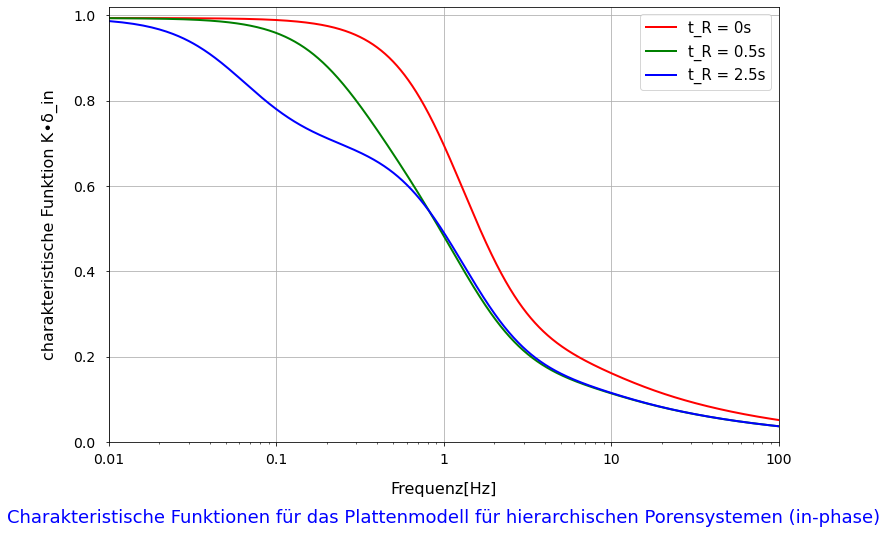

In [13]:
abb_in_hierar = th_in_hierar(f=np.linspace(0.01, 100, num = 100000), L=1.2e-6, D=1.2e-12, K=0.71, list_t_R=[0, 0.5, 2.5], K_omega=0.4)
abb_in_hierar

#### **7.2 die charakteristische out-of-phase Funktion von Diffusionsmodell für hierarchischen Porensystemen**

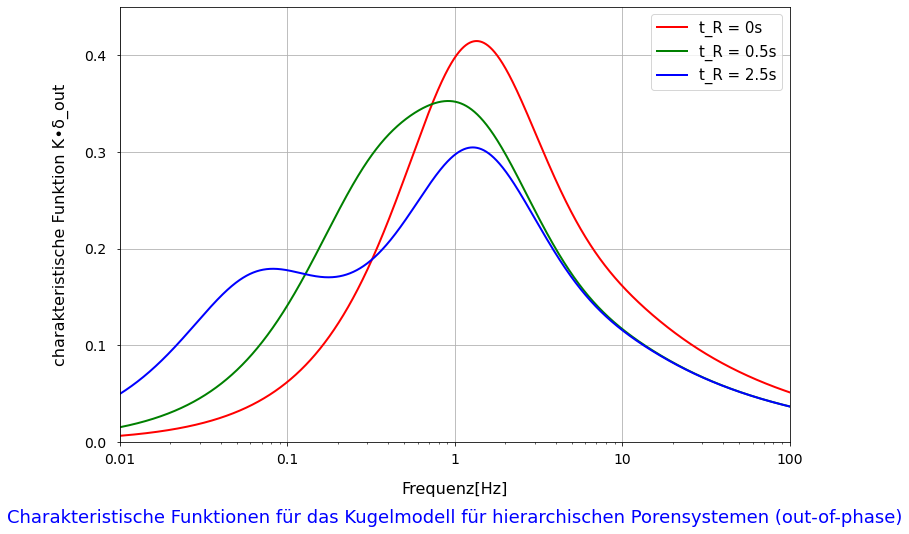

In [14]:
def th_out_hierar(L, D, f, K, list_t_R, K_omega):
    labels = ['t_R = 0s', 't_R = 0.5s', 't_R = 2.5s']
    color = ['r', 'g', 'b']
    plt.figure(figsize=(12, 8))

    x = f 
    l = len(list_t_R)
    list_object, y = list(), list()
    p = pl(L, D, f, K)

    for i in range(l):
        list_object.append(m_hierarchisch(f=f, list_delta_c=[p.func_delta_1c()], list_delta_s=[p.func_delta_1s()], 
                                     list_K=[K], t_R=list_t_R[i], K_omega=K_omega))
        y.append(list_object[i].func_chara_hierar_s())
        plt.plot(x, y[i], label=labels[i], linewidth=2, color=color[i])

    plt.xlim(0.01, 100), plt.ylim(0, 0.45), plt.xscale('log'), plt.yscale('linear')
    plt.xticks([10**-2, 10**-1, 10**0, 10**1, 10**2], [0.01,0.1,1,10,100], rotation=0, fontsize=14, y=-0.01)
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4], rotation=0, fontsize=14, x=-0.01)

    plt.ylabel('charakteristische Funktion K∙δ_out', fontsize=16, labelpad=15)
    plt.xlabel('Frequenz[Hz]', fontsize=16, labelpad=15)
    plt.title("Charakteristische Funktionen für das Kugelmodell für hierarchischen Porensystemen (out-of-phase)", fontsize=18, y=-0.2, color='b')

    plt.legend(loc=1, fontsize=15), plt.grid(True)
    
abb_out_hierar = th_out_hierar(f=np.linspace(0.01, 100, num = 1000000), L=1.2e-6, D=1.2e-12, K=0.71, list_t_R=[0, 0.5, 2.5], K_omega=0.4)
abb_out_hierar

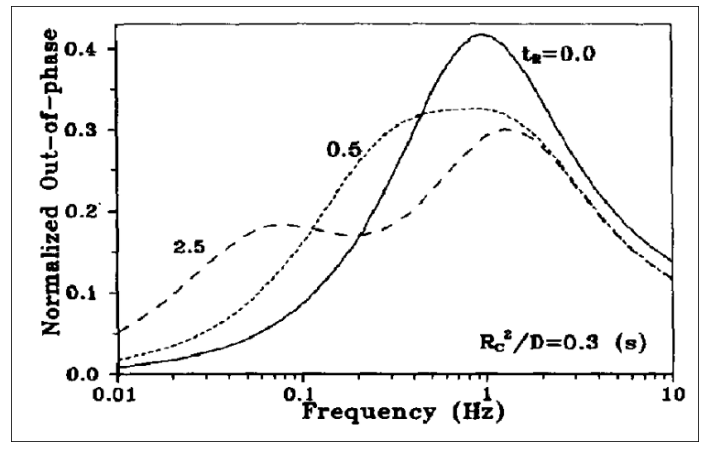

In [15]:
lt_6 = plt.imread('PNG/lt_6.png')
plt.figure(figsize=(15,8))
plt.xticks([])
plt.yticks([])
plt.imshow(lt_6)